In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Florida_Homes.csv")
df1.head()

,Status,Price,Beds,Bath,Sq_feet,Acre-Sqft_Lot,Address,SecondAddress,Location,Zip
0,For Sale,160000.0,3,2,972,sqft lot,685 Duval St; Baldwin; FL 32234,Baldwin; FL 32234,Baldwin,32234
1,For Sale,174999.0,3,2,1080,acre lot,4269 Aurantia Rd; Mims; FL 32754,Mims; FL 32754,Mims,32754
2,For Sale,280000.0,3,2,1596,sqft lot,129 Briarcliff Dr; Kissimmee; FL 34758,Kissimmee; FL 34758,Kissimmee,34758
3,For Sale,239900.0,3,2,976,sqft lot,1139 E Hazzard Ave; Eustis; FL 32726,Eustis; FL 32726,Eustis,32726
4,For Sale,429900.0,4,3,2073,acre lot,1322 Shadeville Rd; Crawfordville; FL 32327,Crawfordville; FL 32327,Crawfordville,32327


In [3]:
df1.shape

(5830, 10)

In [4]:
sleep = df1.groupby('Location')['Location'].agg('count')
print(sleep)

Location
Alachua               8
Altamonte Springs    10
Altoona               1
Alva                 10
Alys Beach            3
                     ..
Winter Springs       20
Youngstown            1
Yulee                 2
Zellwood              2
Zephyrhills          13
Name: Location, Length: 432, dtype: int64


In [5]:
df2 = df1.dropna()
df2.isnull().sum()

Status           0
Price            0
Beds             0
Bath             0
Sq_feet          0
Acre-Sqft_Lot    0
Address          0
SecondAddress    0
Location         0
Zip              0
dtype: int64

In [6]:
df2['Baths'] = df2['Bath'].apply(lambda x: x.split('+')[0])

C:\Users\casey_magiv4w\AppData\Local\Temp\ipykernel_9668\777412401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Baths'] = df2['Bath'].apply(lambda x: x.split('+')[0])


In [7]:
df2['Baths'].unique()

array(['2', '3', '2.5', '5.5', '1', '3.5', '4', '1.5', '4.5', '5', '6.5',
       '6', '7', '0.5', '10', '7.5', '16', '18', '8', '8.5', '10.5'],
      dtype=object)

In [8]:
df3 = df2.copy()

In [9]:
df3.head()

,Status,Price,Beds,Bath,Sq_feet,Acre-Sqft_Lot,Address,SecondAddress,Location,Zip,Baths
0,For Sale,160000.0,3,2,972,sqft lot,685 Duval St; Baldwin; FL 32234,Baldwin; FL 32234,Baldwin,32234,2
1,For Sale,174999.0,3,2,1080,acre lot,4269 Aurantia Rd; Mims; FL 32754,Mims; FL 32754,Mims,32754,2
2,For Sale,280000.0,3,2,1596,sqft lot,129 Briarcliff Dr; Kissimmee; FL 34758,Kissimmee; FL 34758,Kissimmee,34758,2
3,For Sale,239900.0,3,2,976,sqft lot,1139 E Hazzard Ave; Eustis; FL 32726,Eustis; FL 32726,Eustis,32726,2
4,For Sale,429900.0,4,3,2073,acre lot,1322 Shadeville Rd; Crawfordville; FL 32327,Crawfordville; FL 32327,Crawfordville,32327,3


In [10]:
df3['price_per_sqft'] = df3['Price']/df3['Sq_feet']

In [11]:
df3.head()

,Status,Price,Beds,Bath,Sq_feet,Acre-Sqft_Lot,Address,SecondAddress,Location,Zip,Baths,price_per_sqft
0,For Sale,160000.0,3,2,972,sqft lot,685 Duval St; Baldwin; FL 32234,Baldwin; FL 32234,Baldwin,32234,2,164.609053
1,For Sale,174999.0,3,2,1080,acre lot,4269 Aurantia Rd; Mims; FL 32754,Mims; FL 32754,Mims,32754,2,162.036111
2,For Sale,280000.0,3,2,1596,sqft lot,129 Briarcliff Dr; Kissimmee; FL 34758,Kissimmee; FL 34758,Kissimmee,34758,2,175.438596
3,For Sale,239900.0,3,2,976,sqft lot,1139 E Hazzard Ave; Eustis; FL 32726,Eustis; FL 32726,Eustis,32726,2,245.799180
4,For Sale,429900.0,4,3,2073,acre lot,1322 Shadeville Rd; Crawfordville; FL 32327,Crawfordville; FL 32327,Crawfordville,32327,3,207.380608


In [12]:
len(df3.Location.unique())

432

In [13]:
df3.Location = df3.Location.apply(lambda x: x.strip())

In [14]:
len(df3.Location.unique())

432

In [15]:
location_stats = df3.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

In [16]:
location_stats

Location
Orlando               216
Tampa                 186
Kissimmee             116
Cape Coral            115
Miami                 112
                     ... 
Saddle Bunch            1
Royal Palm Estates      1
Hawthorne               1
Havana                  1
Myakka City             1
Name: Location, Length: 432, dtype: int64

In [17]:
len(location_stats[location_stats<=5])

226

In [18]:
location_stats_less_than_5 = location_stats[location_stats<=5]

In [19]:
location_stats_less_than_5

Location
Mims                  5
Ocean Ridge           5
Oldsmar               5
Baker                 5
Sorrento              5
                     ..
Saddle Bunch          1
Royal Palm Estates    1
Hawthorne             1
Havana                1
Myakka City           1
Name: Location, Length: 226, dtype: int64

In [20]:
df3.Location = df3.Location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
len(df3.Location.unique())
df3.head()

,Status,Price,Beds,Bath,Sq_feet,Acre-Sqft_Lot,Address,SecondAddress,Location,Zip,Baths,price_per_sqft
0,For Sale,160000.0,3,2,972,sqft lot,685 Duval St; Baldwin; FL 32234,Baldwin; FL 32234,other,32234,2,164.609053
1,For Sale,174999.0,3,2,1080,acre lot,4269 Aurantia Rd; Mims; FL 32754,Mims; FL 32754,other,32754,2,162.036111
2,For Sale,280000.0,3,2,1596,sqft lot,129 Briarcliff Dr; Kissimmee; FL 34758,Kissimmee; FL 34758,Kissimmee,34758,2,175.438596
3,For Sale,239900.0,3,2,976,sqft lot,1139 E Hazzard Ave; Eustis; FL 32726,Eustis; FL 32726,Eustis,32726,2,245.799180
4,For Sale,429900.0,4,3,2073,acre lot,1322 Shadeville Rd; Crawfordville; FL 32327,Crawfordville; FL 32327,Crawfordville,32327,3,207.380608


In [21]:
df3.price_per_sqft.describe()

count    5829.000000
mean      316.565885
std       267.979096
min        32.488987
25%       201.657459
50%       248.508523
75%       331.858407
max      4253.851460
Name: price_per_sqft, dtype: float64

In [22]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4 = remove_pps_outliers(df3)
df4.shape

(4558, 12)

In [23]:
df4.head()

,Status,Price,Beds,Bath,Sq_feet,Acre-Sqft_Lot,Address,SecondAddress,Location,Zip,Baths,price_per_sqft
0,For Sale,475000.0,4,3,1926,acre lot,20079 NW 159th Pl; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,3,246.625130
1,For Sale,390000.0,4,2,2221,acre lot,12013 NW 69th Way; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,2,175.596578
2,For Sale,484900.0,5,3,2212,acre lot,16510 NW 202nd Dr; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,3,219.213382
3,For Sale,345000.0,3,2,1457,sqft lot,12496 NW 159th Way; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,2,236.787920
4,For Sale,889000.0,4,3.5,3348,acre lot,12424 NW 206th Ter; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,3.5,265.531661


In [24]:
df4.price_per_sqft.mean()

283.29316293821773

In [25]:
df4['Baths'] = df4['Baths'].astype(float)

Text(0, 0.5, 'Count')

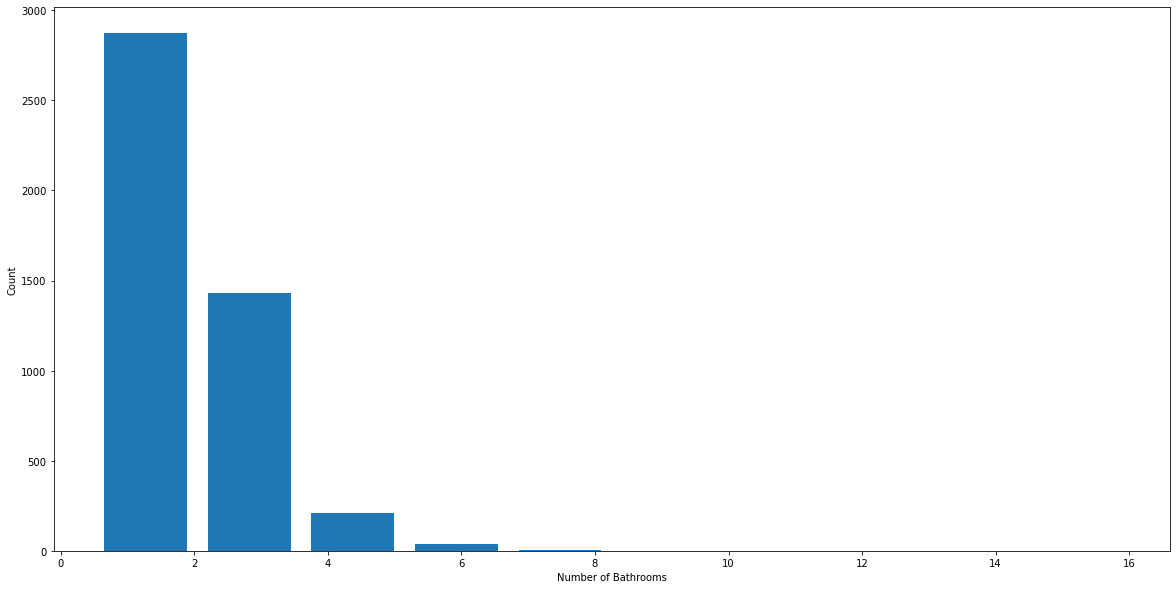

In [26]:
plt.hist(df4.Baths,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [27]:
df4[df4.Baths<1]

,Status,Price,Beds,Bath,Sq_feet,Acre-Sqft_Lot,Address,SecondAddress,Location,Zip,Baths,price_per_sqft
3103,For Sale,545000.0,3,0.5,2212,sqft lot,140 Silverleaf Village Dr; Saint Augustine; FL...,Saint Augustine; FL 32092,Saint Augustine,32092,0.5,246.383363


In [28]:
df5 = df4.drop(['price_per_sqft'],axis='columns')
df5.head()

,Status,Price,Beds,Bath,Sq_feet,Acre-Sqft_Lot,Address,SecondAddress,Location,Zip,Baths
0,For Sale,475000.0,4,3,1926,acre lot,20079 NW 159th Pl; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,3.0
1,For Sale,390000.0,4,2,2221,acre lot,12013 NW 69th Way; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,2.0
2,For Sale,484900.0,5,3,2212,acre lot,16510 NW 202nd Dr; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,3.0
3,For Sale,345000.0,3,2,1457,sqft lot,12496 NW 159th Way; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,2.0
4,For Sale,889000.0,4,3.5,3348,acre lot,12424 NW 206th Ter; Alachua; FL 32615,Alachua; FL 32615,Alachua,32615,3.5


In [29]:
dummies = pd.get_dummies(df5.Location)

In [30]:
df6 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')

In [31]:
df6 = df6.drop(['Status','Bath','Acre-Sqft_Lot','Address','SecondAddress','Zip'],axis='columns')

In [32]:
df6.head()

,Price,Beds,Sq_feet,Location,Baths,Alachua,Altamonte Springs,Alva,Apollo Beach,Apopka,...,West Palm Beach,Weston,Wilton Manors,Wimauma,Windermere,Winter Garden,Winter Haven,Winter Park,Winter Springs,Zephyrhills
0,475000.0,4,1926,Alachua,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,390000.0,4,2221,Alachua,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,484900.0,5,2212,Alachua,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,345000.0,3,1457,Alachua,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,889000.0,4,3348,Alachua,3.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df6.shape

(4558, 211)

In [34]:
X = df6.drop(['Price','Location'],axis='columns')
X.head()


,Beds,Sq_feet,Baths,Alachua,Altamonte Springs,Alva,Apollo Beach,Apopka,Arcadia,Auburndale,...,West Palm Beach,Weston,Wilton Manors,Wimauma,Windermere,Winter Garden,Winter Haven,Winter Park,Winter Springs,Zephyrhills
0,4,1926,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2221,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2212,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1457,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3348,3.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = df6.Price

In [89]:
y.head()

0    475000.0
1    390000.0
2    484900.0
3    345000.0
4    889000.0
Name: Price, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [91]:
#Training model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7536832601706337

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [92]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.71584461, 0.71362266, 0.70204686, 0.63435839, 0.66380758])

In [58]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model_using_gridsearchcv(X,y)

C:\Users\casey_magiv4w\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\casey_magiv4w\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_p

,model,best_score,best_params
0,linear_regression,0.685936,{'normalize': False}
1,lasso,0.685955,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.563558,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [125]:
#predict price function
def predict_price(Location, Beds, Sq_feet, Baths):
    loc_index = np.where(X.columns==Location)[0][0]
    print(loc_index)
    x = np.zeros(len(X.columns))
    x[0] = Beds
    x[1] = Sq_feet
    x[2] = Baths
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [130]:
predict_price('Miami',3,1500,2)

105


C:\Users\casey_magiv4w\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


629245.6573722565

In [104]:
Tampa

Index(['Beds', 'Sq_feet', 'Baths', 'Alachua', 'Altamonte Springs', 'Alva',
       'Apollo Beach', 'Apopka', 'Arcadia', 'Auburndale',
       ...
       'West Palm Beach', 'Weston', 'Wilton Manors', 'Wimauma', 'Windermere',
       'Winter Garden', 'Winter Haven', 'Winter Park', 'Winter Springs',
       'Zephyrhills'],
      dtype='object', length=209)

In [131]:
import pickle
with open('Florida_Home_Prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [132]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))